# Datenvorverarbeitung bei heterogenen Datensets

**Möglichkeiten zum Umgang mit Herausforderungen des Data Preprocessing am Beispiel eines Usecase aus der Finanzbranche**

*Sabrina Raida (535829) - Angewandte Programmierung - Sonstige Beteiligung - SoSe 2020*

## Kontext

Die Daten aus verschiedenen IT-Systemen in einem Unternehmen oder aus externen Quellen sind oft fehlerbehaftet, verrauscht oder unterschiedlich skaliert. Zur Datenanalyse müssen solche Rohdaten zunächst vorverarbeitet werden, was einen nicht unerheblichen Arbeits- und Zeitaufwand darstellt. 

Dieser Beitrag beschäftigt sich mit notwendigen Vorbereitungen, um einen Datensatz für Analysen überhaupt erst nutzbar zu machen. Zu den wichtigsten Aufgaben gehören in diesem Schritt die Erkennung und Behandlung von Fehlern oder anderen ungewollten Effekten.

## CRISP-DM
Der "Cross-Industry Standard Process for Data-Mining" (CRISP-DM) beschreibt die Phasen eines Data Mining Vorhabens, die folgender Grafik entnommen werden können.  [[1]](#CRISP-DM) 

![CRISP-DM](CRISP-DM.png)

Die ersten beiden Phasen "Business Understanding" und "Data Understanding" sind abhängig voneinander. Die Kenntnis des Business Case, aus dem die Daten resultieren, macht es oft erst möglich ein inhaltliches Verständnis zu entwickeln. Auf der anderen Seite kann ein grober Überblick über die vorhandenen Daten, vor allem bei der explorativen Analyse, dabei helfen Analyseziele festzulegen. 

Anschließend erfolgt eine genauere Betrachtung des vorliegenden Datensets. Entscheidende Punkte, die es zu beurteilen gilt sind:

* Datenverfügbarkeit,
* Datenreliabilität und
* Datenqualität.

Zusammen mit der fachlichen Interpretation bilden diese Erkenntnisse die Grundlage, sich für eine angemessene Form der Datenvorverarbeitung zu entscheiden. 

## Business Understanding

Der vorliegende Datensatz liefert Daten eines Finanzinstituts über gewährte Kredite. Das entscheidende Label, nach dem die Fälle unterschieden werden, sind Rückzahlungsschwierigkeiten des Schuldners. Es wird unterschieden, ob Zahlungsschwierigkeiten bestehen oder nicht. Der Kreditgeber, in diesem Fall das Finanzinstitut, kann ein erhebliches Interesse daran haben im Vorfeld der Kreditgewährung die Wahrscheinlichkeit eines Zahlungsausfalls genauer bestimmen zu können. Dafür kann untersucht werden, ob Zusammenhänge zwischen den erfassten Eigenschaften des Kreditnehmers und auftretenden Zahlungsschwierigkeiten festzustellen sind.
Als Eigenschaften des Kreditnehmers wurden bei Beantragung der Finanzierung verschiedenste Umstände erfasst (z.B. ob der Kreditnehmer in Begleitung war) sowie Kriterien, die durch eine direkte Befragung ermittelt wurden (z.B. ob der Kreditnehmer ein Fahrzeug besitzt). Andere Kriterien wiederum lassen sich von Finanzinstituten bei Wirtschaftsauskunfteien, wie der SCHUFA, erfragen (z.B. ob bei anderen Kreditinstituten bereits Finanzierungen angefragt wurden).

Eine für diesen Use Case gängige Fragestellung könnte lauten: "Welche Rückschlüsse lassen die erfassten Eigenschaften des Kreditnehmers auf auftretende Zahlungsschwierigkeiten zu?" Für diesen Auftrag wird der Schritt der Datenvorverarbeitung im Folgenden dargestellt. 
Ziel der gesamten Untersuchung, die hier jedoch nicht vollumfänglich dargestellt wird, wäre beispielsweise einen prädiktiven Algorithmus zu entwerfen. Dieser trifft eine Vorhersage, ob ein eingehender Kreditantrag in der Rückzahlungsphase mit Zahlungsschwierigkeiten behaftet sein wird. Modelliert wird der prädiktive Algorithmus über eine Regression. Ob es sich dabei um ein lineares Regressionsmodell handeln wird oder nicht, wird sich erst während der Datenanalyse zeigen.
Das Finanzinstitut könnte aus den Vorhersagen des prädiktiven Modells verschiedene Konsequenzen ableiten. Kreditanfragen, mit einer hohen Wahrscheinlichkeit zu Zahlungsschwierigkeiten, würden nur zu höheren Zinskonditionen vergeben werden, um das höhere Risiko zu bepreisen oder ganz abgelehnt werden.
Neben den bereits vorhandenen Hintergrundinformationen ist eine Rückfrage beim zuständigen Fachbereich des Unternhemens, welches die Daten geliefert hat, oft sinnvoll, um fachlichen Missverständnissen vorzubeugen und die genauen Anforderungen zu definieren.

## Data Understanding

**Libraries und notwendige Einstellungen**

Oftmals werden zu aktivierende Libraries an den Anfang eines Skriptes gesetzt, damit der Anwender direkt die notwendigen Voreinstellungen für die folgenden Analyseschritte getroffen hat. Nichts desto trotz ergibt sich der Bedarf nach zustätzlichen Paketen oft erst während der Datenanalyse. Aus diesem Grund werden im vorliegenden Beitrag die erforderlichen Libraries erst an der Stelle aktiviert, an der sie zum Einsatz kommen. Der Übersichtlichkeit halber werden sie aber im Anhang nochmal zusammengefasst. 

**Laden des vorliegenden Datensets**

Die Daten liegen in Form von csv-Dateien vor. Es handelt sich um die Dateien "application_data.csv" und "columns_description.csv". Um diese einlesen zu können, benötigt Python die Funktionalitäten des Pakets "pandas". Pandas ist ein schnelles, flexibles, leistungsfähiges und einfach zu nutzendes open-source Tool zur Daten-Analyse und -Verarbeitung, welches auf der Python-Programmiersprache aufgesetzt ist. [[2]](#pandas) 

In [184]:
# Aktivierung des Pakets pandas
import pandas as pd

# Laden der csv-files als DataFrame
df_application = pd.read_csv('credit-card/application_data.csv')

# Vorschau des DataFrame
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,

*Mögliche Schwierigkeiten an dieser Stelle*


Pandas geht unter dem Befehl ``pd.read_csv`` davon aus, dass eine Datei eingelesen wird, in der die Werte wie für ein csv-Format üblich auch wirklich durch Kommata getrennt sind.

* Dass dies nicht der Fall ist, passiert beispielsweise, wenn man eine Excel-Datei als CSV abspeichert. Der Separator ist dann ein Semikolon und wird nicht erkannt. Hier müsste innerhalb der Funktion explizit das Semikolon als Trennungszeichen definiert werden:

    ``pd.reas_csv('[...].csv', sep=';')``


* Enthält ein einzelner Wert einer Tabelle Kommata, weil es sich beispielsweise um einen Text-Kommentar handelt, kann dies ebenfalls zu Problemen führen. Beim Laden von "columns_description.csv" ist dieses Porblem zunächst aufgetaucht und der DataFrame konnte nicht korrekt dargestellt werden.

In [185]:
df_description_fehler = pd.read_csv('credit-card/columns_description_fehler.csv', header=0, nrows=5)

In [186]:
df_description_fehler

,number,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,"2,application_data,TARGET,""Target variable (1 ...",NaN,NaN,NaN,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In der Spalte "Description", in Zeile 2 befand sich ein Kommentar mit Kommata, der die Darstellung verzerrte. In der csv-Datei wurde das Problem manuell beseitigt. Anschließend konnte sie erneut eingelesen werden.

In [187]:
df_description = pd.read_csv('credit-card/columns_description.csv', header=0, nrows=5)

In [188]:
df_description

,number,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 client with payment difficu...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


**Anpassung der Spalten-Benennung**

Eine erste Verknüpfung der Schritte Business und Data Understanding entsteht durch das Hinterfragen der Spaltennamen. 
* Welche Informationen werden in der Spalte bereitgestellt?
* Welche Antwort-Ausprägungen sind dadurch als Werte zu erwarten? 

Im vorliegenden Use Case wurden die Spaltennamen angepasst, um sie sprechender zu formulieren und so die Usebility des Datensets zu verbessern. Um ein Verständnis über die Daten zu erlangen, wurden der vorgegebene Spaltenname, vorhandene Werte in der Spalte sowie die Erläuterungen aus der Tabelle "df_description" miteinbezogen.

In [189]:
df_application.columns = ["LoanID", "PaymentDifficult", "Dispo", "Gender", "OwnCar", "OwnHome", "Children", "Income", 
                          "LoanAmount", "Annuity", "GoodsPurchasePrice", "ApplicationAccompaniment", "IncomeType", 
                          "Education", "FamilyStatus", "HouseCategory", "RegionPopulation", "AgeDays", "SinceCurrentJobDays", 
                          "SinceCurrentAdressDays", "SinceCurrentIDPaperDays", "OwnCarAge", "MobilePhone", 
                          "Erfassungsfehler1", "Erfassungsfehler2", "MobilePhoneContact", "HomePhone", "Email", "JobType", 
                          "FamMembers", "RegionRating", "RegionRatingCity", "ApplicationWeekday", "ApplicationHour", 
                          "AdrRegionIsContactAdrRegion", "AdrRegionIsWorkRegion", "ContactAdrRegionIsWorkRegion", 
                          "AdrCityIsContactAdrCity", "AdrCityIsWorkCity", "ContactAdrCityIsWorkCity", "JobOrganizationType", 
                          "Verständnisprob1", "Verständnisprob2", "Verständnisprob3", "HouseAppartmentAvg", 
                          "HouseBasementAvg", "HouseBeginUseAvg", "HouseBuildAvg", "HouseCommonareaAvg", "HouseElevatorsAvg", 
                          "HouseEntrenceAvg", "HouseFloorsMaxAvg", "HouseFloorsMinAvg", "HousePropertyAreaAvg", 
                          "HouseAppartmentLivingAvg", "HouseLivingAreaAvg", "HouseAppartmentNonLivingAvg", 
                          "HouseNonLivingAreaAvg", "HouseAppartmentMode", "HouseBasementMode", "HouseBeginUseMode", 
                          "HouseBuildMode", "HouseCommonareaMode", "HouseElevatorsMode", "HouseEntrenceMode", 
                          "HouseFloorsMaxMode", "HouseFloorsMinMode", "HousePropertyAreaMode", "HouseAppartmentLivingMode", 
                          "HouseLivingAreaMode", "HouseAppartmentNonLivingMode", "HouseNonLivingAreaMode", 
                          "HouseAppartmentMedi", "HouseBasementMedi", "HouseBeginUseMedi", "HouseBuildMedi", 
                          "HouseCommonareaMedi", "HouseElevatorsMedi", "HouseEntrenceMedi", "HouseFloorsMaxMedi", 
                          "HouseFloorsMinMedi", "HousePropertyAreaMedi", "HouseAppartmentLivingMedi", "HouseLivingAreaMedi", 
                          "HouseAppartmentNonLivingMedi", "HouseNonLivingAreaMedi", "Verständnisprob4", "HouseType", 
                          "HouseTotalAreaMode", "HouseWallsMaterialMode", "Verständnisprob5", "SocialCircleDelay30dpdSometimes", 
                          "SocialCircleDelay30dpdOften", "SocialCircleDelay60dpdSometimes", "SocialCircleDelay60dpdOften", 
                          "SinceCurrentPhoneDays", "Doc2Provided", "Doc3Provided", "Doc4Provided", "Doc5Provided", "Doc6Provided", 
                          "Doc7Provided", "Doc8Provided", "Doc9Provided", "Doc10Provided", "Doc11Provided", "Doc12Provided", 
                          "Doc13Provided", "Doc14Provided", "Doc15Provided", "Doc16Provided", "Doc17Provided", "Doc18Provided",
                          "Doc19Provided", "Doc20Provided", "Doc21Provided", "SchufaRequestHour", "SchufaRequestDay", 
                          "SchufaRequestWeek", "SchufaRequestMonth", "SchufaRequestQuart", "SchufaRequestYear" ]

In [190]:
df_application

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,Erfassungsfehler1,Erfassungsfehler2,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,Verständnisprob1,Verständnisprob2,Verständnisprob3,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,Verständnisprob4,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,Verständnisprob5,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,NaN,0.555912,0.72

**Reduzierung des Datensets um unklare Spalten**

Bei der Durchsicht der verschiedenen Spalten und Anpassung der Benennung sind einige Spalten aufgefallen, die undeutlich benannt waren und aus deren Feld-Beschreibung in der Tabelle "df_description" keine eindeutige Erläuterung hervorging. Auch die Werte ließen keinen Rückschluss auf die Überschrift der Spalte zu, sodass sich dafür entschieden wurde, die Spalten aus dem Datenset herauszunehmen. Spalten mit nicht identifizierbarem Inhalt können ein späteres Interpretationsergebnis eher verfälschen, als dass sie dazu beitragen Zusammenhänge zu erkennen.

Im vorliegenden Fall wurden folgende Spalten entfernt.

In [191]:
df_application.drop(columns = ["Erfassungsfehler1"], inplace = True) #Frühere Spalte "FLAG_EMP_PHONE"
df_application.drop(columns = ["Erfassungsfehler2"], inplace = True) #Frühere Spalte "FLAG_WORK_PHONE"
#In der Beschreibung der beiden Spalten fanden sich widersrüchliche Aussagen darüber, um welche Art Telefon es sich handelt.

df_application.drop(columns = ["Verständnisprob1"], inplace = True) #Frühere Spalte "EXT_SOURCE_1"
df_application.drop(columns = ["Verständnisprob2"], inplace = True) #Frühere Spalte "EXT_SOURCE_2"
df_application.drop(columns = ["Verständnisprob3"], inplace = True) #Frühere Spalte "EXT_SOURCE_3"
df_application.drop(columns = ["Verständnisprob4"], inplace = True) #Frühere Spalte "FONDKAPREMONT_MODE"
df_application.drop(columns = ["Verständnisprob5"], inplace = True) #Frühere Spalte "EMERGENCYSTATE_MODE"
#Namensgebung und Beschreibung lieferten keinen Aufschluss über den Inhalt.

**Umgang mit Missings**

Die Vollständigkeit der einzelnen Spalten in einem Datenset kann stark voneinander abweichen. Dies kann zum einen auf Probleme der Datenverarbeitung in den Vorsystemen zurückzuführen sein, der bedeutendere Faktor ist jedoch bei einer manuellen Erfassung der Daten meist der Erfasser selber. Alle manuell ausgeführten Tätigkeiten sind besonders fehleranfällig. Zeitlicher Druck, Unkenntnis oder Unachtsamkeiten während der Datenerfassung können dazu führen, dass nicht alle Angaben eingeholt werden. Beispielsweise wird die Telefonnummer nicht erfasst, obwohl der Kunde theoretisch bereit gewesen wäre, diese preiszugeben.
Bei einer anschließenden Auswertung sollten solche Phänomene mit einbezogen werden.

In [192]:
pd.options.display.max_columns = None
df_application.describe(include = "all")

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear
count,1923.000000,1922.000000,1922,1922,1922,1922,1922.000000,1.922000e+03,1.922000e+03,1922.000000,1.921000e+03,1917,1922,1922,1922,1922,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,668.000000,1922.0,1922.000000,1922.000000,1922.000000,1359,1922.000000,1922.000000,1922.000000,1922,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922,966.000000,822.000000,1001.000000,678.000000,604.000000,924.000000,981.000000,995.000000,641.000000,804.000000,630.000000,980.000000,612.000000,899.000000,966.000000,822.000000,1001.000000,678.00000,604.000000,924.000000,981.000000,995.000000,641.000000,804.000000,630.000000,980.000000,612.000000,899.000000,966.000000,822.000000,1001.000000,678.000000,604.000000,924.000000,981.000000,995.000000,641.000000,804.000000,630.000000,980.000000,612.000000,899.000000,988,1014.000000,972,1911.000000,1911.000000,1911.000000,1911.000000,1922.000000,1922.0,1922.000000,1922.0,1922.000000,1922.000000,1922.0,1922.000000,1922.000000,1922.0,1922.000000,1922.0,1922.000000,1922.000000,1922.00000,1922.000000,1922.00000,1922.000000,1922.000000,1922.00000,1922.00000,1642.000000,1642.000000,1642.000000,1642.00000,1642.000000,1642.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,5,4,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [193]:
# Um einen visuellen Überblick über die Missings zu bekommen, wird ein Hilfs-DataFrame angelegt.
grafik_nan = {'AuftretenWert': ['WertFehlt', 'WertVorhanden'], 'Count' : [df_application.isna().sum().sum(), df_application.notnull().sum().sum()]}
df_grafik_nan = pd.DataFrame(grafik_nan, columns=['AuftretenWert', 'Count'])

Zur Visualisierung eignet sich das Paket ``matplotlib``, welches eine vielzahl vordefinierter Styles für Grafiken vorhält. [[3]](#matplot) 

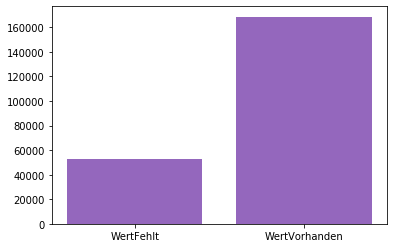

In [194]:
# Import des Pakets Matplotlib zur Visualisierung von Verteilungen
import matplotlib.pyplot as plt

# Darstellung des Verhältnis von fehlenden zu vorhandenen Werten in einem Säulendiagramm
plt.bar(df_grafik_nan.AuftretenWert, df_grafik_nan.Count, color = 'tab:purple')
plt.draw()

Es wird deutlich, dass relativ viele Werte fehlen. Welche Auswirkungen das auf die Analyse und die Herleitung eines prädiktiven Algorithmus hat, kann jedoch erst beurteilt werden, wenn man sich ein genaueres Bild davon verschafft an welchen Stellen die Werte fehlen.

Bei der Betrachtung der Zusammenfassung fällt im Hinblick auf fehlende Werte auf:

| Nummer | Betroffene Spalte | Bemerkung zu fehlenden Werten| 
|----------|:--------:|:---------|
| 1 | LoanID | Es wird ein Kredit mehr erfasst, als beispielsweise Angaben über Zahlungsschwierigkeiten vorhanden sind. Ohne diese Angabe zur Zahlumgsschwierigkeit kann der Datensatz nicht interpretiert werden |
| 2 | GoodsPurchasePrice | Ein Preis für ein kreditfininziertes Produkt wurde nicht erfasst. |
| 3 | ApplicationAccompaniment | Bei fünf Kreditvergaben wurde nicht aufgezeichnet ob der Antragsteller in Begleitung war. |
| 4 | OwnCarAge | Nur wenn ein Auto vorhanden ist, kann das Alter des Fahrzeugs erfasst werden. Es ist weiter zu prüfen, ob 668 eigene Autos vorhanden sind. |
| 5 | JobType | Es wurde nur bei 1.359 Kreditkonsumenten die Art des Beschäftigungsverhältnis erfasst. |
| 6 | House[...] | Die Angaben über das Wohnhaus, in dem der Kreditnehmer lebt, sind in allen Punkten unvollständig. |
| 7 | SocialCircle[...] | Bei 11 Datensätzen fehlen die Angaben über Zahlungsschwierigkeiten im sozialen Umfeld. |
| 8 | SchufaRequest[...] | Bei 280 der Datensätze wurde keine Angabe erfasst, ob im Vorfeld bereits Schufa-Anfragen zum Kunden gesendet wurden. |



Für den Umgang mit fehlenden Daten haben sich in der Praxis folgende Verfahren bewährt:

* List Wise Deletion - Ausschluss der Datensätze, wenn mindestens ein Wert fehlt.
* Median Imputation - Fehlende Werte werden durch Kalkulation von statistischen Größen ersetzt.
* Last Observation Carried Forward (LOCF) - Fehlende Daten werden durch die Werte des vorhergehenden Datensatzes ersetzt.
* Hot Deck Imputation - Fehlende Werte werden durch beobachtbare Ausprägungen desselben Merkmals ersetzt. Man arbeitet hier vorwiegend mit Imputationsklassen. 

**Umgang mit den Auffälligkeiten 1. bis 8. des Use Case**

**1. LoanID**
- List Wise Deletion
- Löschung des fehlerhaften Datensatzes.

In [195]:
# Anzeige der LoanID mit sonst leerem Datensatz.
df_application[df_application["PaymentDifficult"].isnull()]

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear
1922,10225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Löschen des leeren Datensatzes aus dem Datenset.
df_application = df_application[df_application["PaymentDifficult"].notnull()]

**2. GoodsPurchasePrice**
- Hot Deck Imputation
- Abhängig vom jeweiligen Kreditbetrag wird ein Mittelwert des Kaufobjekt-Preises gebildet.

NumPy bietet ein Grundpaket für wissenschaftliches Rechnen in Python und kann unteranderem auch zur Bestimmung von Mittelwerten genutzt werden.  [[4]](#numpy)

In [197]:
# Um einen Mittelwert zu berechnen bietet es sich an das Paket NumPy zu nutzen.
import numpy as np
np.mean(df_application["LoanAmount"]/df_application["GoodsPurchasePrice"])

1.1198015245538153

In [198]:
# Der Kaufpreis des kreditfinanzierten Objekts beträgt durchschnittlich 111,98% des Kreditbetrags.
# Folgender Fall weist den fehlenden Wert auf.
df_application[df_application["GoodsPurchasePrice"].isnull()] # Es handelt sich um Row-Index 724

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear
724,100837,0.0,Revolving loans,F,N,Y,2.0,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02461,-10072.0,-381.0,-519.0,-1834.0,NaN,1.0,1.0,0.0,0.0,Core staff,4.0,2.0,2.0,WEDNESDAY,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Kindergarten,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.007,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.0073,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.0071,NaN,NaN,block of flats,0.0079,"Stone, brick",2.0,1.0,2.0,1.0,-2011.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# Unter der Annahme, dass der Kaufpreis des kreditfinanzierten Objekts ebenfalls 111,98% des Kreditbetrags ausmachen soll, ergibt sich folgender Preis.
135000 * 1.1198 # Entspricht: LoanAmount * 111,98%

151173.0

In [200]:
df_application['GoodsPurchasePrice'].fillna((135000 * 1.1198), inplace=True) # Einsetzen des ermittelten Preises

In [201]:
df_application[724:725] # Anzeigen des ergänzten Wertes in Zeile 724

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear
724,100837,0.0,Revolving loans,F,N,Y,2.0,45000.0,135000.0,6750.0,151173.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02461,-10072.0,-381.0,-519.0,-1834.0,NaN,1.0,1.0,0.0,0.0,Core staff,4.0,2.0,2.0,WEDNESDAY,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Kindergarten,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.007,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.0073,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.0071,NaN,NaN,block of flats,0.0079,"Stone, brick",2.0,1.0,2.0,1.0,-2011.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


**3. ApplicationAccompaniment**
- Imputation des häufigsten Wertes
- Da es sich um eine Spalte mit dem Datentyp "object" handelt, kann kein Durchschnitt ermittelt werden. 
- Die Befüllung der leeren Felder richtet sich nach dem am häufigsten vorkommenden Wert.

In [202]:
# Folgende Fälle weisen fehlende Werte auf.
df_application[df_application["ApplicationAccompaniment"].isnull()] # Es handelt sich um Row-Index 64, 724, 1199, 1669 und 1862

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear
64,100076,0.0,Cash loans,M,Y,N,0.0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866.0,-2546.0,-5448.0,-4097.0,1.0,1.0,1.0,0.0,0.0,Drivers,2.0,2.0,2.0,MONDAY,12.0,0.0,0.0,0.0,0.0,0.0,0.0,Transport: type 3,0.0124,NaN,0.9677,0.558,0.0013,0.0,0.0690,0.0417,0.0417,0.0489,0.0101,0.010,0.0,0.0,0.0126,NaN,0.9677,0.5753,0.0013,0.0,0.0690,0.0417,0.0417,0.05,0.011,0.0105,0.0,0.0,0.0125,NaN,0.9677,0.5639,0.0013,0.0,0.0690,0.0417,0.0417,0.0498,0.0103,0.0102,0.0,0.0,block of flats,0.0079,Block,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0.0,Revolving loans,F,N,Y,2.0,45000.0,135000.0,6750.0,151173.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072.0,-381.0,-519.0,-1834.0,NaN,1.0,1.0,0.0,0.0,Core staff,4.0,2.0,2.0,WEDNESDAY,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Kindergarten,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.007,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.0073,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.0,0.0345,0.0417,NaN,NaN,NaN,0.0071,NaN,NaN,block of flats,0.0079,"Stone, brick",2.0,1.0,2.0,1.0,-2011.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0.0,Cash loans,M,Y,N,0.0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717.0,-2393.0,-5486.0,-4513.0,5.0,1.0,1.0,0.0,0.0,NaN,2.0,1.0,1.0,SUNDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Transport: type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0.0,Cash loans,F,Y,N,2.0,153000.0,1162170.0,30654.0,8325

In [203]:
df_maxcountsaccomp = df_application.dropna(subset=["ApplicationAccompaniment"]) # Hilfs-DataFrame zum Ausschluss der leeren Felder
df_maxcountsaccomp["ApplicationAccompaniment"].value_counts().idxmax() # Ermittlung des häufigsten Wertes

'Unaccompanied'

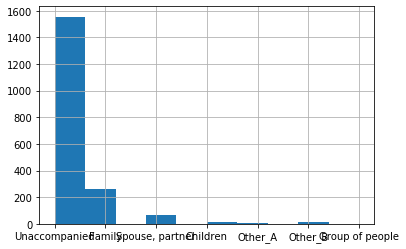

In [204]:
# Als häufigster Wert wurde "Unaccompanied" bestimmt.

# Dies wird auch deutlich, wenn man das Histogram zur Spalte "ApplicationAccompaniment" betrachtet.
df_application.ApplicationAccompaniment.hist()

In [205]:
df_application["ApplicationAccompaniment"].fillna(("Unaccompanied"), inplace=True) # Einsetzen des Wertes

In [206]:
# Anzeigen der ergänzten Werte
print(df_application.loc[[64], ["ApplicationAccompaniment"]])
print(df_application.loc[[724], ["ApplicationAccompaniment"]])
print(df_application.loc[[1199], ["ApplicationAccompaniment"]])
print(df_application.loc[[1669], ["ApplicationAccompaniment"]])
print(df_application.loc[[1862], ["ApplicationAccompaniment"]])
print()

   ApplicationAccompaniment
64            Unaccompanied
    ApplicationAccompaniment
724            Unaccompanied
     ApplicationAccompaniment
1199            Unaccompanied
     ApplicationAccompaniment
1669            Unaccompanied
     ApplicationAccompaniment
1862            Unaccompanied




**4. OwnCarAge**
- Es ist zu prüfen, ob für jedes erfasste Fahrzeug, ein Fahrzeug-Alter erfasst wurde.

Um SQL über Python in erweitertem Umfang nutzen zu können, wird das Paket ``sqlalchemy`` genutzt. [[5]](#sql)

In [207]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df_application.to_sql("df_application", engine)
pd.read_sql_query("SELECT COUNT(OwnCar) FROM df_application WHERE OwnCar = 'Y'", engine)

,COUNT(OwnCar)
0,668


In [208]:
# Es wurden mit 688 erfassten Fahrzeugen genau so viele Fahrzeuge dokumentiert, wie Altersangaben zu Fahrzeugen vorhanden sind.
# Um sicherzustellen, ob die Angaben zeilenweise wirklich konsistent sind, wird noch geprüft, dass die beiden Spalten einer Zeile zusammenpassen:
pd.read_sql_query("SELECT LoanID, OwnCar, OwnCarAge FROM df_application WHERE OwnCar = 'Y' AND OwnCarAge IS NULL", engine)

,LoanID,OwnCar,OwnCarAge


Es liegen keine Fälle vor, bei denen ein Fahrzeug vorhanden ist, aber kein Alter dazu angegeben. Daher müssen die 688 Altersangaben (OwnCarAge), den 688 Fahrzeugen (OwnCar) korrekt zugeordnet sein.
Das Auftreten eines fehlenden Wertes bei OwnCarAge, hängt von der Variable OwnCar ab. (MAR)

*Exkurs Missing Data Prozesse*

Das Auftreten von fehlenden Werten kann in drei Kategorien unterschieden werden:
* Missing Completly at Random (MCAR) - 
Das Auftreten eines fehlenden Wertes in der Variable Y ist nicht abhängig von den Ausprägung der Variable Y selbst oder den restlichen Variablen X1 bis Xn im Datensatz.

* Missing at Random (MAR) -
Das Auftreten eines fehlenden Wertes in einer Variable Y ist vollständig durch die Ausprägungen einer oder mehrerer der restlichen Variablen X1 bis Xn erklärbar.

* Not Missing at Random (NMAR) -
Das Auftreten von fehlenden Werten in der Variable Y ist von der (unbekannten) Ausprägung der Variable Y abhängig und ist nicht durch die Ausprägungen der übrigen Variabeln X1 bis Xn erklärbar.

Da die fehlende Werte in diesem Fall nach der fachlichen Interpretation korrekt sind, kann sich darüber beholfen werden neue Variablen zu bilden, die sich aus der ursprünglichen ableiten. Für dieses konkrete Beispiel soll für das Fahrzeugalter mit unterschiedlichen Kategorien gearbeitet.

In [209]:
df_minmaxOwnCarAge = df_application.dropna(subset=["OwnCarAge"]) # Hilfs-DataFrame zum Ausschluss der leeren Felder
print("Ältestes Fahrzeug")
print(max(df_minmaxOwnCarAge["OwnCarAge"]))
print()
print("Neustes Fahrzeug")
print(min(df_minmaxOwnCarAge["OwnCarAge"]))

Ältestes Fahrzeug
65.0

Neustes Fahrzeug
0.0


Auf Basis dieser Range werden folgende Kategorien gebildet, die als neue Spalten dem DataFrame hinzugefügt werden:

Bezeichnung für neue Spalte | Fahrzeug-Kategorie | Definition
------------ |------------ | ------------
NewCar | Neufahrzeuge und Jahreswagen | Fahrzeuge < 2 Jahre 
YoungUsedCar | Junge Gebrauchte | Fahrzeuge 2 bis 5 Jahre
UsedCar | Gebrauchte | 6 bis 14 Jahre 
Youngtimer | Youngtimer | Fahrzeuge 15 bis 29 Jahre
Oldtimer | Oldtimer | Fahrzeuge >30 Jahre

In [238]:
df_application['NewCar'] = df_application.OwnCarAge.apply(
               lambda x: (1 if x < 2 else 0))
df_application['YoungUsedCar'] = df_application.OwnCarAge.apply(
               lambda x: (1 if x >= 2 and x <= 5 else 0))
df_application['UsedCar'] = df_application.OwnCarAge.apply(
               lambda x: (1 if x >= 6 and x <= 14 else 0))
df_application['Youngtimer'] = df_application.OwnCarAge.apply(
               lambda x: (1 if x >= 15 and x <= 29 else 0))
df_application['Oldtimer'] = df_application.OwnCarAge.apply(
               lambda x: (1 if x >= 30 else 0))

C:\Users\sabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [211]:
# Anzeige der alten Spalte "OwnCarAge" sowie der zugehörigen neuen Spalten.
df_application.to_sql("df_application2", engine)
pd.read_sql_query("SELECT OwnCarAge, NewCar, YoungUsedCar, UsedCar, Youngtimer, Oldtimer  FROM df_application2", engine)

,OwnCarAge,NewCar,YoungUsedCar,UsedCar,Youngtimer,Oldtimer
0,NaN,0,0,0,0,0
1,NaN,0,0,0,0,0
2,26.0,0,0,0,1,0
3,NaN,0,0,0,0,0
4,NaN,0,0,0,0,0
...,...,...,...,...,...,...
1917,NaN,0,0,0,0,0
1918,NaN,0,0,0,0,0
1919,NaN,0,0,0,0,0
1920,14.0,0,0,1,0,0


Die neuen Spalten kennen nur die zwei Ausprägungen "0" für "nein" und "1" für "ja". Dadruch bedarf es keiner fehlenden Werte mehr, da die Spalte nun für jeden der Fälle beantwortet werden kann.
Die ursprüngliche Spalte "OwnCarAge" ist somit obsolet geworden und kann entfernt werden.

In [212]:
df_application.drop('OwnCarAge', axis=1)

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear,NewCar,YoungUsedCar,UsedCar,Youngtimer,Oldtimer
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,block of flats,0.0149,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,block of flats,0.0714,Block,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0

**5. JobType**
- Es wurde nur bei 1.359 Kreditkonsumenten die Art des Beschäftigungsverhältnisses erfasst. 

In [213]:
# Folgende Fälle weisen fehlende Werte auf.
df_application[df_application["JobType"].isnull()] # Es handelt sich um 563 Fälle

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear,NewCar,YoungUsedCar,UsedCar,Youngtimer,Oldtimer
8,100011,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099.0,365243.0,-7427.0,-3514.0,NaN,1.0,1.0,0.0,0.0,NaN,2.0,2.0,2.0,WEDNESDAY,14.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
11,100015,0.0,Cash loans,F,N,Y,0.0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417.0,365243.0,-5246.0,-2512.0,NaN,1.0,1.0,1.0,0.0,NaN,2.0,2.0,2.0,FRIDAY,7.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2396.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0
23,100027,0.0,Cash loans,F,N,Y,0.0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827.0,365243.0,-9012.0,-3684.0,NaN,1.0,1.0,1.0,0.0,NaN,2.0,3.0,3.0,FRIDAY,12.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,0.1443,0.0848,0.9876,0.8300,0.1064,0.14,0.1207,0.3750,0.4167,0.2371,0.1173,0.1484,0.0019,0.0007,0.1261,0.0754,0.9876,0.8367,0.0000,0.1208,0.1034,0.3750,0.4167,0.2425,0.1102,0.0923,0.0000,0.0000,0.1457,0.0848,0.9876,0.8323,0.1071,0.14,0.1207,0.3750,0.4167,0.2412,0.1193,0.1510,0.0019,0.0007,block of flats,0.1640,Mixed,0.0,0.0,0.0,0.0,-795.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0
28,100033,0.0,Cash loans,M,Y,Y,0.0,270000.000,790830.0,57676.5,6

In [214]:
# Die Verteilung auf die einzelnen JobTypen setzt sich wie folgt zusammen. 
pd.read_sql_query("SELECT JobType, COUNT(*) AS AbsoluteZahl, (COUNT(*) * 100 / (SELECT COUNT(JobType)  FROM df_application)) AS RelativerAnteil FROM df_application GROUP BY JobType", engine)

,JobType,AbsoluteZahl,RelativerAnteil
0,None,563,41
1,Accountants,62,4
2,Cleaning staff,23,1
3,Cooking staff,35,2
4,Core staff,181,13
5,Drivers,132,9
6,HR staff,4,0
7,High skill tech staff,84,6
8,IT staff,4,0
9,Laborers,353,25


Da sich kein "JobType" durch eine auffallende Häufigkeit von den anderen abhebt, bietet sich kein Einsatz des häufigsten Merkmals für die fehlenden Werte an.
- Bsp.: Ein Einsatz von "Laborers" für fehlende Werte, würde das Auftreten dieses Merkmals mehr als verdoppeln und somit die Verteilung verfälschen.

In [215]:
# Um einen Eindruck zu gewinnen, ob zwischen "JobOrganizationType" und "JobType" ein Zusammenhang besteht, 
# wird exemplarisch ein "JobType" mit dem "JobOrganizationType" kombiniert. 
pd.read_sql_query("SELECT DISTINCT JobOrganizationType, JobType FROM df_application WHERE JobType = 'Accountants'", engine)

,JobOrganizationType,JobType
0,Business Entity Type 3,Accountants
1,Industry: type 11,Accountants
2,Transport: type 4,Accountants
3,Self-employed,Accountants
4,Bank,Accountants
5,Medicine,Accountants
6,Industry: type 3,Accountants
7,Business Entity Type 1,Accountants
8,Government,Accountants
9,Agriculture,Accountants


Für 62 erfasste "Accountants" wurden 18 unterschiedliche "JobOrganizationTypes" erfasst.
Ein Rückschluss von "JobOrganizationType" auf "JobType" ist demnach auf dieser Datengrundlage nicht herzustellen.

Denkbar wäre, dass die Tatsache, ob überhaupt eine Aussage zum "JobType" getroffen/erfasst wurde, Rückschlüsse auf ein späteres Rückzahlungsverhalten zulässt. 
Da es sich um nominale Merkmale handelt, könnte hier für fehlende Werte ein "nicht erfasst" ergänzt werden.

In [216]:
df_application["JobType"].fillna(("nicht erfasst"), inplace=True) # Einsetzen des Wertes "nicht erfasst" für fehlende Werte.

**6. House[...]**
- Median Imputation
- Die Angaben über das Wohnhaus, in dem der Kreditnehmer lebt, sind in allen Punkten unvollständig. 

Da es sich bei allen Attributen, außer "HouseType" und "HouseWallsMaterialMode", um metrisch skalierte Merkmale handelt, wird bei diesen mit einer Ergänzung über den Mittelwert gearbeitet. 

In [217]:
# Im Folgenden wird der Weg einmal ausführlich am Beispiel der ersten Spalte beschrieben.
print("Mittelwert von HouseAppartmentAvg:")
print(np.mean(df_application["HouseAppartmentAvg"]))

Mittelwert von HouseAppartmentAvg:
0.11921915113871612


In [218]:
print(df_application["HouseAppartmentAvg"])

0       0.0247
1       0.0959
2          NaN
3          NaN
4          NaN
         ...  
1917    0.1227
1918       NaN
1919    0.1113
1920    0.1072
1921    0.0000
Name: HouseAppartmentAvg, Length: 1922, dtype: float64


Fehlende Werte in dieser Spalte sind z.B. an den Positionen Row-Index 2, 3 und 4 zu finden.

Für die verschiedenen Formen der Imputation bietet scikit-learn die Kategorie ``SimpleImputer()``.
Dieser ersetzt fehlende Werte direkt über das ausgewählte Imputations-Verfahren, beispielweise ``(strategy = 'mean')``,
ohne dass vorher jedes Mal separat der Mittelwert über ``np.mean()`` bestimmt werden muss. [[6]](#sklearn2020a)

In [219]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy = 'mean')
df_application["HouseAppartmentAvg"] = simple_imputer.fit_transform(df_application[["HouseAppartmentAvg"]])

print(df_application["HouseAppartmentAvg"])

0       0.024700
1       0.095900
2       0.119219
3       0.119219
4       0.119219
          ...   
1917    0.122700
1918    0.119219
1919    0.111300
1920    0.107200
1921    0.000000
Name: HouseAppartmentAvg, Length: 1922, dtype: float64


C:\Users\sabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Schaut man nun auf Row-Index 2, 3 und 4, erkennt man, dass die fehlenden Werte durch den Mittelwert ersetzt wurden.

Um einen Vorher-Nachher-Vergleich zu haben, werden fehlende Werte grafisch durch die Farbe Pink dargestellt.
Hierzu wird das Paket ``seaborn`` verendet. [[7]](#seaborn)

Text(0.5, 1, 'Fehlende Werte House[...] vor Imputation')

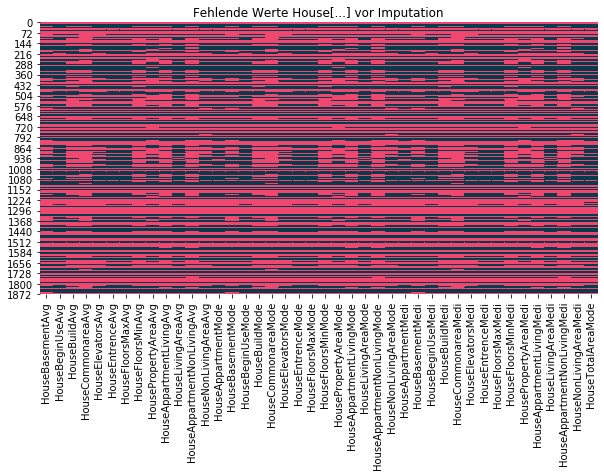

In [220]:
import seaborn as sns

f = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
g1 = sns.heatmap(pd.DataFrame(df_application[["HouseBasementAvg", "HouseBeginUseAvg", "HouseBuildAvg", "HouseCommonareaAvg", "HouseElevatorsAvg", 
                          "HouseEntrenceAvg", "HouseFloorsMaxAvg", "HouseFloorsMinAvg", "HousePropertyAreaAvg", 
                          "HouseAppartmentLivingAvg", "HouseLivingAreaAvg", "HouseAppartmentNonLivingAvg", 
                          "HouseNonLivingAreaAvg", "HouseAppartmentMode", "HouseBasementMode", "HouseBeginUseMode", 
                          "HouseBuildMode", "HouseCommonareaMode", "HouseElevatorsMode", "HouseEntrenceMode", 
                          "HouseFloorsMaxMode", "HouseFloorsMinMode", "HousePropertyAreaMode", "HouseAppartmentLivingMode", 
                          "HouseLivingAreaMode", "HouseAppartmentNonLivingMode", "HouseNonLivingAreaMode", 
                          "HouseAppartmentMedi", "HouseBasementMedi", "HouseBeginUseMedi", "HouseBuildMedi", 
                          "HouseCommonareaMedi", "HouseElevatorsMedi", "HouseEntrenceMedi", "HouseFloorsMaxMedi", 
                          "HouseFloorsMinMedi", "HousePropertyAreaMedi", "HouseAppartmentLivingMedi", "HouseLivingAreaMedi", 
                          "HouseAppartmentNonLivingMedi", "HouseNonLivingAreaMedi", "HouseTotalAreaMode"]]).isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False)
g1.set_title('Fehlende Werte House[...] vor Imputation')

In [221]:
simple_imputer = SimpleImputer(strategy = 'mean')
df_application[["HouseBasementAvg", "HouseBeginUseAvg", "HouseBuildAvg", "HouseCommonareaAvg", "HouseElevatorsAvg", 
                          "HouseEntrenceAvg", "HouseFloorsMaxAvg", "HouseFloorsMinAvg", "HousePropertyAreaAvg", 
                          "HouseAppartmentLivingAvg", "HouseLivingAreaAvg", "HouseAppartmentNonLivingAvg", 
                          "HouseNonLivingAreaAvg", "HouseAppartmentMode", "HouseBasementMode", "HouseBeginUseMode", 
                          "HouseBuildMode", "HouseCommonareaMode", "HouseElevatorsMode", "HouseEntrenceMode", 
                          "HouseFloorsMaxMode", "HouseFloorsMinMode", "HousePropertyAreaMode", "HouseAppartmentLivingMode", 
                          "HouseLivingAreaMode", "HouseAppartmentNonLivingMode", "HouseNonLivingAreaMode", 
                          "HouseAppartmentMedi", "HouseBasementMedi", "HouseBeginUseMedi", "HouseBuildMedi", 
                          "HouseCommonareaMedi", "HouseElevatorsMedi", "HouseEntrenceMedi", "HouseFloorsMaxMedi", 
                          "HouseFloorsMinMedi", "HousePropertyAreaMedi", "HouseAppartmentLivingMedi", "HouseLivingAreaMedi", 
                          "HouseAppartmentNonLivingMedi", "HouseNonLivingAreaMedi", "HouseTotalAreaMode"]] = simple_imputer.fit_transform(df_application[["HouseBasementAvg", 
                        "HouseBeginUseAvg", "HouseBuildAvg", "HouseCommonareaAvg", "HouseElevatorsAvg", 
                          "HouseEntrenceAvg", "HouseFloorsMaxAvg", "HouseFloorsMinAvg", "HousePropertyAreaAvg", 
                          "HouseAppartmentLivingAvg", "HouseLivingAreaAvg", "HouseAppartmentNonLivingAvg", 
                          "HouseNonLivingAreaAvg", "HouseAppartmentMode", "HouseBasementMode", "HouseBeginUseMode", 
                          "HouseBuildMode", "HouseCommonareaMode", "HouseElevatorsMode", "HouseEntrenceMode", 
                          "HouseFloorsMaxMode", "HouseFloorsMinMode", "HousePropertyAreaMode", "HouseAppartmentLivingMode", 
                          "HouseLivingAreaMode", "HouseAppartmentNonLivingMode", "HouseNonLivingAreaMode", 
                          "HouseAppartmentMedi", "HouseBasementMedi", "HouseBeginUseMedi", "HouseBuildMedi", 
                          "HouseCommonareaMedi", "HouseElevatorsMedi", "HouseEntrenceMedi", "HouseFloorsMaxMedi", 
                          "HouseFloorsMinMedi", "HousePropertyAreaMedi", "HouseAppartmentLivingMedi", "HouseLivingAreaMedi", 
                          "HouseAppartmentNonLivingMedi", "HouseNonLivingAreaMedi", "HouseTotalAreaMode"]])

C:\Users\sabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sabri\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0.5, 1, 'Test auf fehlende Werte House[...] nach Imputation')

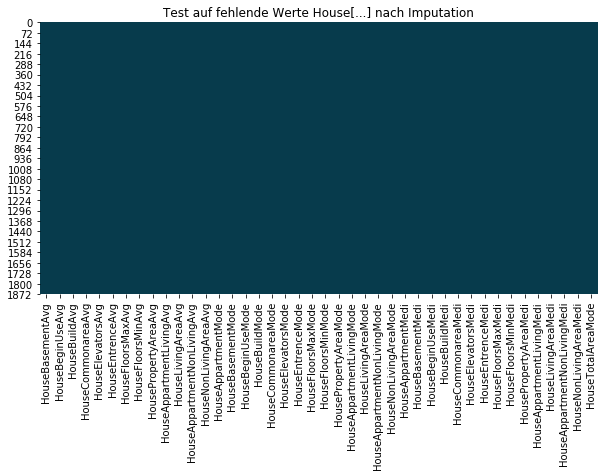

In [222]:
import seaborn as sns

f = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
g1 = sns.heatmap(pd.DataFrame(df_application[["HouseBasementAvg", "HouseBeginUseAvg", "HouseBuildAvg", "HouseCommonareaAvg", "HouseElevatorsAvg", 
                          "HouseEntrenceAvg", "HouseFloorsMaxAvg", "HouseFloorsMinAvg", "HousePropertyAreaAvg", 
                          "HouseAppartmentLivingAvg", "HouseLivingAreaAvg", "HouseAppartmentNonLivingAvg", 
                          "HouseNonLivingAreaAvg", "HouseAppartmentMode", "HouseBasementMode", "HouseBeginUseMode", 
                          "HouseBuildMode", "HouseCommonareaMode", "HouseElevatorsMode", "HouseEntrenceMode", 
                          "HouseFloorsMaxMode", "HouseFloorsMinMode", "HousePropertyAreaMode", "HouseAppartmentLivingMode", 
                          "HouseLivingAreaMode", "HouseAppartmentNonLivingMode", "HouseNonLivingAreaMode", 
                          "HouseAppartmentMedi", "HouseBasementMedi", "HouseBeginUseMedi", "HouseBuildMedi", 
                          "HouseCommonareaMedi", "HouseElevatorsMedi", "HouseEntrenceMedi", "HouseFloorsMaxMedi", 
                          "HouseFloorsMinMedi", "HousePropertyAreaMedi", "HouseAppartmentLivingMedi", "HouseLivingAreaMedi", 
                          "HouseAppartmentNonLivingMedi", "HouseNonLivingAreaMedi", "HouseTotalAreaMode"]]).isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False)
g1.set_title('Test auf fehlende Werte House[...] nach Imputation')

Es ist zu erkennen, dass die vorher farblich gekennzeichneten fehlenden Werte ersetzt wurden.

In [223]:
# Um über den Umgang mit den fehlenden Werten der object-Datentypen zu entscheiden, wird sich zunächst ein Überblick verschafft.
pd.read_sql_query("SELECT HouseType, COUNT(*) AS AbsoluteZahl FROM df_application GROUP BY HouseType", engine)

,HouseType,AbsoluteZahl
0,None,934
1,block of flats,975
2,specific housing,6
3,terraced house,7


Die meisten Kreditnehmer leben in "block of flats" oder die Wohnungsform wurde nicht erfasst. 
Alle nicht erfassten Wohnungsformen auf "block of flats" zu setzen, würde für eine spätere Analyse keinen Mehrwert bringen, da das Kriterium "HouseType" dann kaum zur Fallunterscheidung herangezogen werden könnte. Merkmalsausprägungen von "specific housing" und ""terraced house" zu "block of flats", im Verhältnis 13 : 1.909 werden keine Rückschlüsse zulassen, da die Fallanzahlen der abweichenden Attributsausprägung (""terraced house" / "block of flats") zu gering sind.

Es wäre jedoch vorstellbar, dass die Tatsache, ob überhaupt eine Aussage zum Wohnungstyp getroffen/erfasst wurde, Rückschlüsse auf ein späteres Rückzahlungsverhalten zulässt. Da es sich um nominale Merkmale handelt, könnte hier für fehlende Werte ein "nicht erfasst" ergänzt werden.
Auf Grund der geringen Anzahl an Wohnungsformen neben "block of flats" wird sich hier dazu entschieden die Ergebnisse zu aggregieren und zwei Kategorien zu bilden:

* Yes (1): "HouseType" erfasst, also "specific housing", "terraced house" und "block of flats"
* No (0): "HouseType" nicht erfasst, alle "NANs"

In [224]:
# Zeilen, in denen "block of flats", "specific housing" oder "terraced house" eingetragen sind, werden durch "Y" ersetzt.
df_application.loc[df_application["HouseType"] == "block of flats", "HouseType"] = 1
df_application.loc[df_application["HouseType"] == "specific housing", "HouseType"] = 1
df_application.loc[df_application["HouseType"] == "terraced house", "HouseType"] = 1

In [225]:
df_application["HouseType"].fillna((0), inplace=True) # Einsetzen des Wertes "0" für fehlende Werte.

C:\Users\sabri\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [226]:
df_application["HouseType"]

0       1
1       1
2       0
3       0
4       0
       ..
1917    1
1918    1
1919    1
1920    1
1921    1
Name: HouseType, Length: 1922, dtype: int64

**7. SocialCircle[...]**
- Median Imputation
- Bei 11 Datensätzen fehlen die Angaben über Zahlungsschwierigkeiten im sozialen Umfeld.

In [227]:
df_application[df_application['SocialCircleDelay30dpdSometimes'].isnull()] # Es handelt sich um die Row-Keys: 68, 394, 397, 457, 1042, 1064, 1156, 1209, 1486, 1743 und 1844.

,LoanID,PaymentDifficult,Dispo,Gender,OwnCar,OwnHome,Children,Income,LoanAmount,Annuity,GoodsPurchasePrice,ApplicationAccompaniment,IncomeType,Education,FamilyStatus,HouseCategory,RegionPopulation,AgeDays,SinceCurrentJobDays,SinceCurrentAdressDays,SinceCurrentIDPaperDays,OwnCarAge,MobilePhone,MobilePhoneContact,HomePhone,Email,JobType,FamMembers,RegionRating,RegionRatingCity,ApplicationWeekday,ApplicationHour,AdrRegionIsContactAdrRegion,AdrRegionIsWorkRegion,ContactAdrRegionIsWorkRegion,AdrCityIsContactAdrCity,AdrCityIsWorkCity,ContactAdrCityIsWorkCity,JobOrganizationType,HouseAppartmentAvg,HouseBasementAvg,HouseBeginUseAvg,HouseBuildAvg,HouseCommonareaAvg,HouseElevatorsAvg,HouseEntrenceAvg,HouseFloorsMaxAvg,HouseFloorsMinAvg,HousePropertyAreaAvg,HouseAppartmentLivingAvg,HouseLivingAreaAvg,HouseAppartmentNonLivingAvg,HouseNonLivingAreaAvg,HouseAppartmentMode,HouseBasementMode,HouseBeginUseMode,HouseBuildMode,HouseCommonareaMode,HouseElevatorsMode,HouseEntrenceMode,HouseFloorsMaxMode,HouseFloorsMinMode,HousePropertyAreaMode,HouseAppartmentLivingMode,HouseLivingAreaMode,HouseAppartmentNonLivingMode,HouseNonLivingAreaMode,HouseAppartmentMedi,HouseBasementMedi,HouseBeginUseMedi,HouseBuildMedi,HouseCommonareaMedi,HouseElevatorsMedi,HouseEntrenceMedi,HouseFloorsMaxMedi,HouseFloorsMinMedi,HousePropertyAreaMedi,HouseAppartmentLivingMedi,HouseLivingAreaMedi,HouseAppartmentNonLivingMedi,HouseNonLivingAreaMedi,HouseType,HouseTotalAreaMode,HouseWallsMaterialMode,SocialCircleDelay30dpdSometimes,SocialCircleDelay30dpdOften,SocialCircleDelay60dpdSometimes,SocialCircleDelay60dpdOften,SinceCurrentPhoneDays,Doc2Provided,Doc3Provided,Doc4Provided,Doc5Provided,Doc6Provided,Doc7Provided,Doc8Provided,Doc9Provided,Doc10Provided,Doc11Provided,Doc12Provided,Doc13Provided,Doc14Provided,Doc15Provided,Doc16Provided,Doc17Provided,Doc18Provided,Doc19Provided,Doc20Provided,Doc21Provided,SchufaRequestHour,SchufaRequestDay,SchufaRequestWeek,SchufaRequestMonth,SchufaRequestQuart,SchufaRequestYear,NewCar,YoungUsedCar,UsedCar,Youngtimer,Oldtimer
68,100080,0.0,Revolving loans,F,N,N,1.0,157500.0,450000.0,22500.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.010966,-11956.0,-3154.0,-8118.0,-4143.0,NaN,1.0,1.0,0.0,0.0,Sales staff,3.0,2.0,2.0,SUNDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Kindergarten,0.217500,0.145500,0.989100,0.850400,0.044300,0.240000,0.206900,0.333300,0.375000,0.134300,0.177400,0.212900,0.00000,0.003900,0.221600,0.15090,0.989100,0.85630,0.044700,0.241700,0.2069,0.333300,0.375000,0.137300,0.193800,0.221800,0.000000,0.004100,0.219600,0.145500,0.98910,0.852400,0.044500,0.240000,0.206900,0.333300,0.375000,0.136600,0.180400,0.216700,0.00000,0.004000,1,0.192500,Panel,NaN,NaN,NaN,NaN,-1711.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,0,0,0,0
394,100457,0.0,Revolving loans,F,Y,Y,0.0,211500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.006008,-8922.0,-728.0,-8882.0,-66.0,7.0,1.0,1.0,1.0,0.0,Core staff,1.0,2.0,2.0,MONDAY,12.0,0.0,0.0,0.0,1.0,1.0,0.0,Trade: type 2,0.111300,0.069700,0.988100,0.836800,0.071200,0.120000,0.103400,0.333300,0.375000,0.051100,0.090800,0.116400,0.00000,0.000000,0.113400,0.07240,0.988100,0.84320,0.071800,0.120800,0.1034,0.333300,0.375000,0.052200,0.099200,0.121300,0.000000,0.000000,0.112400,0.069700,0.98810,0.839000,0.071700,0.120000,0.103400,0.333300,0.375000,0.052000,0.092300,0.118500,0.00000,0.000000,1,0.106300,"Stone, brick",NaN,NaN,NaN,NaN,-638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
397,100460,0.0,Revolving loans,F,N,N,0.0,315000.0,540000.0,27000.0,540000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,Rented apartment,0.014464,-9842.0,-157.0,-2291.0,-2291.0,NaN,1.0,1.0,0.0,0.0,nicht erfasst,1.0,2.0,2.0,FRIDAY,13.0,0.0,1.0,1.0,0.0,0.0,0.0,Business Enti

In [228]:
# Da es sich bei allen Attributen um ordinalskalierte Merkmale handelt, wird bei der Ergänzung mit dem Median gearbeitet. 
# Da nur ganzzahlige Ergebnisse vorkommen / Sinn ergeben, wird gerundet.
df_application['SocialCircleDelay30dpdSometimes'].fillna(round((np.nanmedian(df_application["SocialCircleDelay30dpdSometimes"]))), inplace=True)
df_application['SocialCircleDelay30dpdOften'].fillna(round((np.nanmedian(df_application["SocialCircleDelay30dpdOften"]))), inplace=True)
df_application['SocialCircleDelay60dpdSometimes'].fillna(round((np.nanmedian(df_application["SocialCircleDelay60dpdSometimes"]))), inplace=True)
df_application['SocialCircleDelay60dpdOften'].fillna(round((np.nanmedian(df_application["SocialCircleDelay60dpdOften"]))), inplace=True)
# der Befehl "np.nanmedian", sorgt anstelle von "np.median" dafür, dass "NANs" bei der Meidan-Berechnung ignoriert werden.

**8. SchufaRequest[...]**
- Median Imputation
- Bei 280 der Datensätze wurde keine Angabe erfasst, ob im Vorfeld bereits Schufa-Anfragen zum Kunden gesendet wurden. 

In [229]:
# Wie im vorhergehenden Fall handelt es sich um ordinalskalierte Merkmale und es wird mit dem Median gearbeitet. 
# Da nur ganzzahlige Ergebnisse vorkommen / Sinn ergeben, wird gerundet.
df_application['SchufaRequestHour'].fillna(round((np.nanmedian(df_application["SchufaRequestHour"]))), inplace=True)
df_application['SchufaRequestDay'].fillna(round((np.nanmedian(df_application["SchufaRequestDay"]))), inplace=True)
df_application['SchufaRequestWeek'].fillna(round((np.nanmedian(df_application["SchufaRequestWeek"]))), inplace=True)
df_application['SchufaRequestMonth'].fillna(round((np.nanmedian(df_application["SchufaRequestMonth"]))), inplace=True)
df_application['SchufaRequestQuart'].fillna(round((np.nanmedian(df_application["SchufaRequestQuart"]))), inplace=True)
df_application['SchufaRequestYear'].fillna(round((np.nanmedian(df_application["SchufaRequestYear"]))), inplace=True)

**Bereinigung der Ausprägungen zu besseren Auswertbarkeit**

Jedes Feld der Tabelle ist nun mit einem plausiblen Wert befüllt. Es geht im Folgenden nur noch darum, die Inhalte so zu gestalten, dass sie für eine Analyse möglichst einfach struturiert und die Ergebnisse klar verständlich sind. 
Spalten, die Auskunft über eine Ja-/Nein-Frage geben, die unterschieden werden können in "True" or "False", sollen einheitlich in "0" und "1" umgeschrieben werden.
Momentan gibt es noch unterschiedliche Benennungen in der Tabelle.
* 0 = False; N; No
* 1 = True; Y; Yes

In [230]:
df_application.loc[df_application["OwnCar"] == "N", "OwnCar"] = 0
df_application.loc[df_application["OwnCar"] == "Y", "OwnCar"] = 1
df_application.loc[df_application["OwnHome"] == "N", "OwnHome"] = 0
df_application.loc[df_application["OwnHome"] == "Y", "OwnHome"] = 1

Desweiteren werden Ausdrücke innerhalb einer Spalte vereinheitlicht, die das Gleiche aussagen, nur unterschiedlich benannt sind.

In [231]:
df_application.loc[df_application["FamilyStatus"] == "Civil marriage", "FamilyStatus"] = "Married"

Über die Einbindung eines einfachen "SQL-SELECT" lassen sich nacheinander die vorhandenen Merkmalsausprägungen einer Spalte anzeigen und auf Plausibilität prüfen. So können mögliche weitere Anpassungsbedarfe aufgedeckt werden.

In [232]:
pd.read_sql_query("SELECT IncomeType, COUNT(*) AS AbsoluteZahl FROM df_application GROUP BY IncomeType", engine)

,IncomeType,AbsoluteZahl
0,Commercial associate,467
1,Pensioner,328
2,State servant,125
3,Unemployed,1
4,Working,1001


**Plausibilisierung der Datentypen**

Für eine Verarbeitung der Daten, sollten die Datentypen der einzelnen Spalten geprüft werden. Je nachdem in welchem Datentyp die Daten gespeichert sind, können deren Werte unterschiedlich gedeutet werden und bei der Analyse womöglich Fehlinterpretationen nach sich ziehen.

Um zu beurteilen, ob eine Spalte einen konsistenten Datentyp aufweist, muss die Bedeutung sowie der erwartete Inhalt der Spalte klar sein. Daher bietet es sich an, diesen Step nach Anppassung der Spalten und ihrer Namensgebung durchzuführen, da man hier bereits intensiv in das Tabellenverständnis eingestiegen ist.

In [233]:
pd.options.display.max_rows = None
print("Datentypen von Dataframe Application:")
print(" ")
# Um den Datentyp aller 119 Spalten anzuzeigen:
df_application.dtypes

Datentypen von Dataframe Application:
 


LoanID                               int64
PaymentDifficult                   float64
Dispo                               object
Gender                              object
OwnCar                               int64
OwnHome                              int64
Children                           float64
Income                             float64
LoanAmount                         float64
Annuity                            float64
GoodsPurchasePrice                 float64
ApplicationAccompaniment            object
IncomeType                          object
Education                           object
FamilyStatus                        object
HouseCategory                       object
RegionPopulation                   float64
AgeDays                            float64
SinceCurrentJobDays                float64
SinceCurrentAdressDays             float64
SinceCurrentIDPaperDays            float64
OwnCarAge                          float64
MobilePhone                        float64
MobilePhone

Manche Daten, die einen numerischen Wert wiedergeben, sind als Float gespeichert, obwohl hier nur ganze Werte vorkommen und sinnvoll sind. 
Ein Beispiel ist die Spalte "Children". Die Angabe wie viele Kinder der Antragsteller hat, ergibt nur als Ganzzahl Sinn.
Diese Spalten werden hinsichtlich ihres Datentyps angepasst.

In [234]:
df_application['PaymentDifficult'].astype('int64').dtypes
df_application['OwnCar'].astype('int64').dtypes
df_application['OwnHome'].astype('int64').dtypes
df_application['Children'].astype('int64').dtypes
df_application['AgeDays'].astype('int64').dtypes
df_application['SinceCurrentJobDays'].astype('int64').dtypes
df_application['SinceCurrentAdressDays'].astype('int64').dtypes
df_application['SinceCurrentIDPaperDays'].astype('int64').dtypes
df_application['MobilePhone'].astype('int64').dtypes
df_application['MobilePhoneContact'].astype('int64').dtypes
df_application['HomePhone'].astype('int64').dtypes
df_application['Email'].astype('int64').dtypes
df_application['FamMembers'].astype('int64').dtypes
df_application['RegionRating'].astype('int64').dtypes
df_application['RegionRatingCity'].astype('int64').dtypes
df_application['AdrRegionIsContactAdrRegion'].astype('int64').dtypes
df_application['AdrRegionIsWorkRegion'].astype('int64').dtypes
df_application['ContactAdrRegionIsWorkRegion'].astype('int64').dtypes
df_application['AdrCityIsContactAdrCity'].astype('int64').dtypes
df_application['AdrCityIsWorkCity'].astype('int64').dtypes
df_application['ContactAdrCityIsWorkCity'].astype('int64').dtypes
df_application['SocialCircleDelay30dpdSometimes'].astype('int64').dtypes
df_application['SocialCircleDelay30dpdOften'].astype('int64').dtypes
df_application['SocialCircleDelay60dpdSometimes'].astype('int64').dtypes
df_application['SocialCircleDelay60dpdOften'].astype('int64').dtypes
df_application['SinceCurrentPhoneDays'].astype('int64').dtypes

dtype('int64')

In [235]:
df_application['Doc2Provided'].astype('int64').dtypes
df_application['Doc3Provided'].astype('int64').dtypes
df_application['Doc4Provided'].astype('int64').dtypes
df_application['Doc5Provided'].astype('int64').dtypes
df_application['Doc6Provided'].astype('int64').dtypes
df_application['Doc7Provided'].astype('int64').dtypes
df_application['Doc8Provided'].astype('int64').dtypes
df_application['Doc9Provided'].astype('int64').dtypes
df_application['Doc10Provided'].astype('int64').dtypes
df_application['Doc11Provided'].astype('int64').dtypes
df_application['Doc12Provided'].astype('int64').dtypes
df_application['Doc13Provided'].astype('int64').dtypes
df_application['Doc14Provided'].astype('int64').dtypes
df_application['Doc15Provided'].astype('int64').dtypes
df_application['Doc16Provided'].astype('int64').dtypes
df_application['Doc17Provided'].astype('int64').dtypes
df_application['Doc18Provided'].astype('int64').dtypes
df_application['Doc19Provided'].astype('int64').dtypes
df_application['Doc20Provided'].astype('int64').dtypes
df_application['Doc21Provided'].astype('int64').dtypes

dtype('int64')

In [236]:
df_application['SchufaRequestHour'].astype('int64').dtypes
df_application['SchufaRequestDay'].astype('int64').dtypes
df_application['SchufaRequestWeek'].astype('int64').dtypes
df_application['SchufaRequestMonth'].astype('int64').dtypes
df_application['SchufaRequestQuart'].astype('int64').dtypes
df_application['SchufaRequestYear'].astype('int64').dtypes

dtype('int64')

## Weiteres Vorgehen

Die Daten sind nun in einem bereinigten Zustand und können für Analysen verwendet werden. Je nachdem welche Analysen durchgeführt werden sollen, sind eventuell noch einzelne Anpassungen notwendig. Vielleicht zeigt sich auch, dass es sinnvoll wäre die Daten noch weiter zu aggregieren, beispielsweise die verschiedenen Kriterien zur Wohnungsform zusammenzufassen. Meist bietet es sich an zunächst die Korrelationen zwischen den Attributen zu prüfen und dann über weitere Schritte zu entscheiden.

Die folgenden Schritte können wieder dem CRISP-DM entnommen werden:

![CRISP-DM](CRISP-DM2.png)

## References<a class="anchor" id="references"></a>

[1]<a class="anchor" id="CRISP-DM"></a> Wirth, R., & Hipp, J. (2000). CRISP-DM: Towards a standard process model for data mining. In Proceedings of the 4th international conference on the practical applications of knowledge discovery and data mining (pp. 29-39). London, UK: Springer-Verlag.

[2]<a class="anchor" id="pandas"></a>  pandas (2020). pandas. Retrieved 2020-05-30 from https://pandas.pydata.org/ 

[3]<a class="anchor" id="matplot"></a> The Matplotlib development team (2018). Style sheets reference. Retrieved 2020-05-30 from https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

[4]<a class="anchor" id="numpy"></a> NumPy developers (2020). NumPy. Retrieved 2020-05-30 from https://numpy.org/

[5]<a class="anchor" id="numpy"></a> SQLAlchemy (2020). Retrieved 2020-30-05 from https://docs.sqlalchemy.org/en/13/core/engines.html 

[6]<a class="anchor" id="sklearn20204"></a> The scikit-learn developers (2020). Preprocessing data. Retrieved 2020-05-30 from https://scikit-learn.org/stable/modules/preprocessing.html#

[7]<a class="anchor" id="seaborn"></a> Bisong, E. (2019). Matplotlib and Seaborn. In Building Machine Learning and Deep Learning Models on Google Cloud Platform (p. 152). Apress, Berkeley, CA.

*Sabrina Raida, Matrikel-Nr.: 535829, 30.05.2020*